# Using the O'Neil (2019) Observation-based Priors

by Sarah Blunt (2024)

In [13]:
# TODO (clarissa): write tutorial intro

import numpy as np
import os
import multiprocessing as mp

from orbitize import read_input, priors, system, sampler, DATADIR

### Set up MCMC run

In [14]:
# TODO (clarissa): use orbit that converges faster

input_file = os.path.join(DATADIR, "xyz_test_data.csv")

data_table = read_input.read_file(input_file)
mtot = 1.0
plx = 10.0

# TODO (sarah): note that the fitting basis choice here is required (can't fit in any other orbitize! basis)
# if we want to use obspriors
mySystem = system.System(
    1, data_table, mtot, plx, mass_err=0, plx_err=0, fitting_basis="ObsPriors"
)

print("We are fitting using this orbital basis: {}".format(mySystem.param_idx))

We are fitting using this orbital basis: {'per1': 0, 'ecc1': 1, 'inc1': 2, 'aop1': 3, 'pan1': 4, 'tp1': 5, 'plx': 6, 'mtot': 7}


## Modify Priors

Define the priors on `per`, `ecc`, and `tp` to be the O'Neil observation-based prior.

In [15]:
# TODO (sarah): note that the obsprior uses errors and epochs, need to pass those in

ra_err = mySystem.data_table["quant1_err"]
dec_err = mySystem.data_table["quant1_err"]
epochs = np.array(mySystem.data_table["epoch"])

# define the `ObsPrior` object
my_obsprior = priors.ObsPrior(ra_err, dec_err, epochs, mtot)

# set the priors on `sma`, `ecc`, `tau`, `mtot`, and `plx` to point to this object
for i in [
    mySystem.param_idx["per1"],
    mySystem.param_idx["ecc1"],
    mySystem.param_idx["tp1"],
]:
    mySystem.sys_priors[i] = my_obsprior

mySystem.sys_priors

[ObsPrior, ObsPrior, Sine, Uniform, Uniform, ObsPrior, 10.0, 1.0]

### Run MCMC!

Starting Burn in


/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array) / normalization)
/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array) / normalization)
/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array) / normalization)
/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array) / normalization)
/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array) / normalization)
/Users/bluez3303/Documents/GitHub/orbitize/orbitize/priors.py:482: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(n

10/10 steps of burn-in complete
Burn in complete. Sampling posterior now.
10/10 steps completed
Run complete


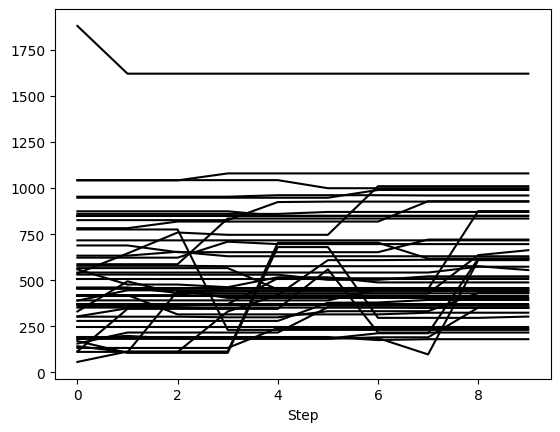

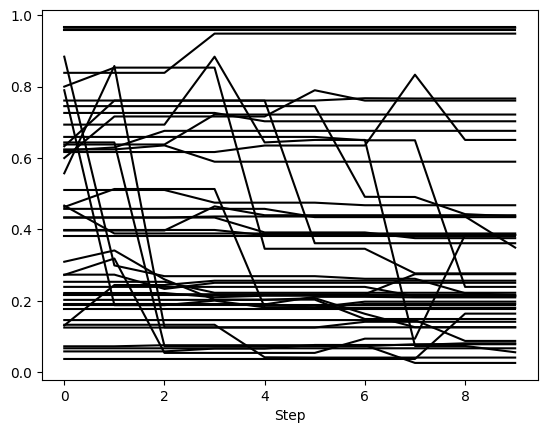

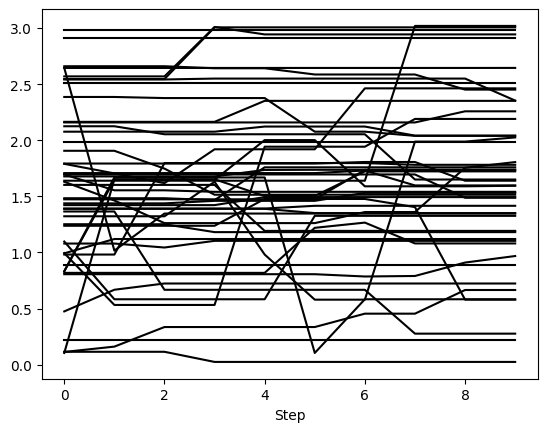

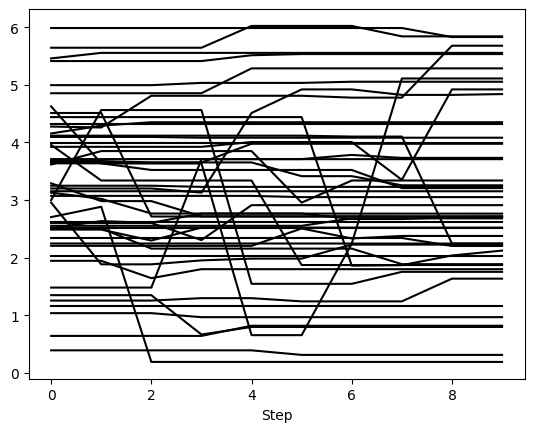

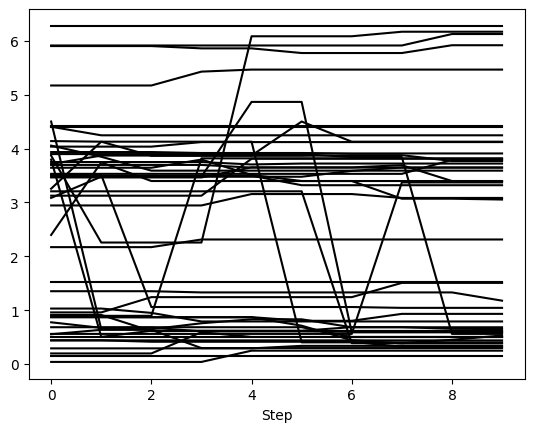

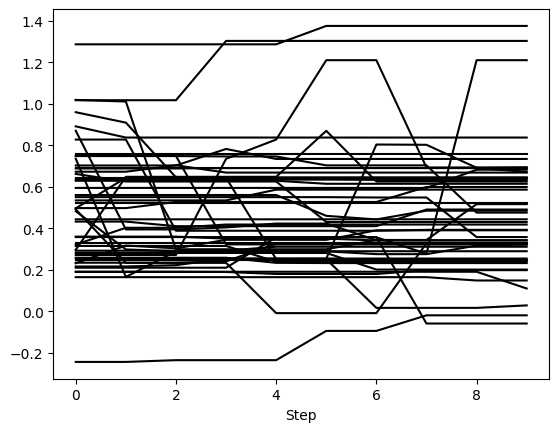

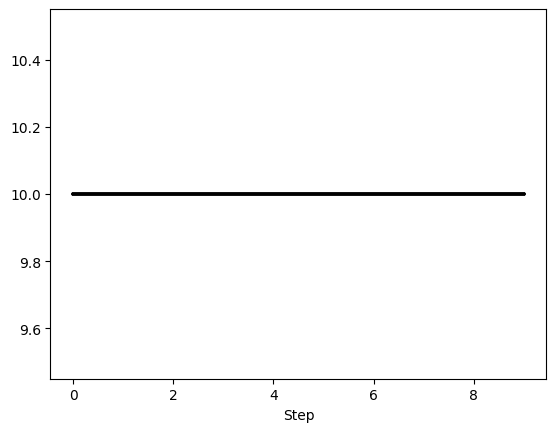

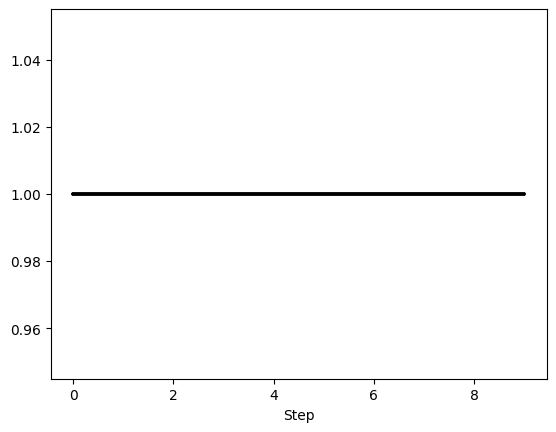

In [16]:
# create an MCMC object using our newly modified System object
num_temps = 5
num_walkers = 50
num_threads = mp.cpu_count()
myMCMC = sampler.MCMC(
    mySystem, num_temps=num_temps, num_walkers=num_walkers, num_threads=num_threads
)

n_steps_per_walker = 10
n_burn_steps = 10

myMCMC.run_sampler(n_steps_per_walker * num_walkers, burn_steps=10, examine_chains=True)

In [17]:
my_corner = myMCMC.results.plot_corner()
my_corner

KeyError: 'tp'